C:\Users\haris\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8615 - loss: 0.4752
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9530 - loss: 0.1564
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1113
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.0898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0710
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0829
Test accuracy: 0.9789999723434448
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


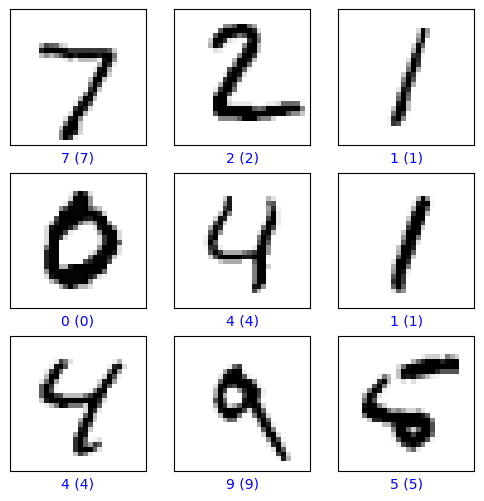

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Make predictions
predictions = model.predict(x_test)

# Display some predictions
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Show a few test images with predictions
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(num_cols * 2, num_rows * 2))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions[i], y_test[i], x_test[i])
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tkinter as tk
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the trained model
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# Create a GUI for drawing digits
class DigitRecognizer:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Recognizer")
        
        self.canvas = tk.Canvas(root, width=280, height=280, bg='black')
        self.canvas.pack()
        
        self.button_predict = tk.Button(root, text='Predict', command=self.predict_digit)
        self.button_predict.pack()
        
        self.button_clear = tk.Button(root, text='Clear', command=self.clear_canvas)
        self.button_clear.pack()
        
        self.label = tk.Label(root, text='', font=('Helvetica', 24))
        self.label.pack()
        
        self.canvas.bind('<B1-Motion>', self.draw)
        
        self.image = Image.new('L', (28, 28), color=0)
        self.draw_image = ImageDraw.Draw(self.image)
    
    def draw(self, event):
        x, y = event.x, event.y
        self.canvas.create_oval(x, y, x+10, y+10, fill='white', outline='white')
        self.draw_image.ellipse([x//10, y//10, x//10+1, y//10+1], fill=255)
    
    def predict_digit(self):
        img = self.image.resize((28, 28))
        img = np.array(img)
        img = img / 255.0
        img = img.reshape(1, 28, 28)
        
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)
        self.label.config(text=f'Predicted Digit: {predicted_digit}')
    
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new('L', (28, 28), color=0)
        self.draw_image = ImageDraw.Draw(self.image)

# Run the application
root = tk.Tk()
app = DigitRecognizer(root)
root.mainloop()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8534 - loss: 0.4969
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.1535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9668 - loss: 0.1111
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9721 - loss: 0.0915
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
